Copyright (c) 2019 Illumina, Inc.

Author: Egor Dolzhenko <edolzhenko@illumina.com>,

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://urldefense.com/v3/__http://www.gnu.org/licenses/__;!ZZtMHXGkRuE!B_j_-Is5G9GAWuBdAOF0Pirm9ZAv2h9hZFuItq-skx1tF_BWpMr0pCr0yo-BxWcyZHGXSrU$ >.

In [6]:
import itertools
import numpy as np
import scipy
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
%matplotlib inline

In [7]:
import json
import os

In [8]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Roboto Condensed'
plt.rcParams['font.size'] = 16

## Load data

In [32]:
repeat_sizes = pd.read_csv('/Users/kibanez/Documents/STRs/VALIDATION/table_validation_simple_withMaxAllele.tsv', sep='\t')
repeat_sizes.head()

,loci,VALIDATIONSET.ID,read.length,EH_a1,EH_a2,max_EH_allele
0,AR,VALIDATIONSET_1,150,44,57.0,57.0
1,AR,VALIDATIONSET_2,150,40,40.0,40.0
2,AR,VALIDATIONSET_3,150,55,62.0,62.0
3,AR,VALIDATIONSET_4,150,42,44.0,44.0
4,AR,VALIDATIONSET_5,150,24,NaN,NaN


## Prepare data for plotting

   loci  VALIDATIONSET ID  read-length EH-version  EH_a1 EH_a2    STR_a1  \
0    AR   VALIDATIONSET_1          150  EH-v2.5.5     44    57  positive   
1    AR   VALIDATIONSET_2          150  EH-v2.5.5     40    40  positive   
2    AR   VALIDATIONSET_3          150  EH-v2.5.5     55    62        53   
3    AR   VALIDATIONSET_4          150  EH-v2.5.5     42    44        45   
4    AR   VALIDATIONSET_5          150  EH-v2.5.5     24    na        24   
5    AR   VALIDATIONSET_6          125  EH-v2.5.5     23    na        24   
6    AR   VALIDATIONSET_7          125  EH-v2.5.5     26    27        27   
7    AR   VALIDATIONSET_8          125  EH-v2.5.5     15    na        16   
8    AR   VALIDATIONSET_9          125  EH-v2.5.5     20    na        22   
9    AR  VALIDATIONSET_10          125  EH-v2.5.5     27    na        28   
10   AR  VALIDATIONSET_11          125  EH-v2.5.5     27    na        28   
11   AR  VALIDATIONSET_12          125  EH-v2.5.5     18    na        19   
12   AR  VAL

In [25]:
repeat_info = {
    'AR':      {'expected_range': [34*3, 38*3],   'unit_len': 3, 'index': 12},
    'ATN1':    {'expected_range': [46*3, 48*3],   'unit_len': 3, 'index': 11},
    'ATXN1':   {'expected_range': [39*3, 44*3],   'unit_len': 3, 'index': 10},
    'ATXN2':   {'expected_range': [32*3, 33*3],   'unit_len': 3, 'index': 9},    
    'ATXN3':   {'expected_range': [45*3, 60*3],   'unit_len': 3, 'index': 8},    
    'ATXN7':   {'expected_range': [34*3, 36*3],   'unit_len': 3, 'index': 7},    
    'CACNA1A':   {'expected_range': [18*3, 20*3],   'unit_len': 3, 'index': 6},    
    'C9orf72':   {'expected_range': [60*6, 60*6],   'unit_len': 6, 'index': 5},        
    'FXN':     {'expected_range': [44*3, 66*3],   'unit_len': 3, 'index': 4},
    'HTT':     {'expected_range': [36*3, 40*3],   'unit_len': 3, 'index': 3},
    'TBP':    {'expected_range': [44*3, 49*3],   'unit_len': 3, 'index': 2},
    'FMR1':    {'expected_range': [55*3, 200*3],  'unit_len': 3, 'index': 1},
    'PPP2R2B':    {'expected_range': [32*3, 51*3],   'unit_len': 3, 'index': 0}    
}

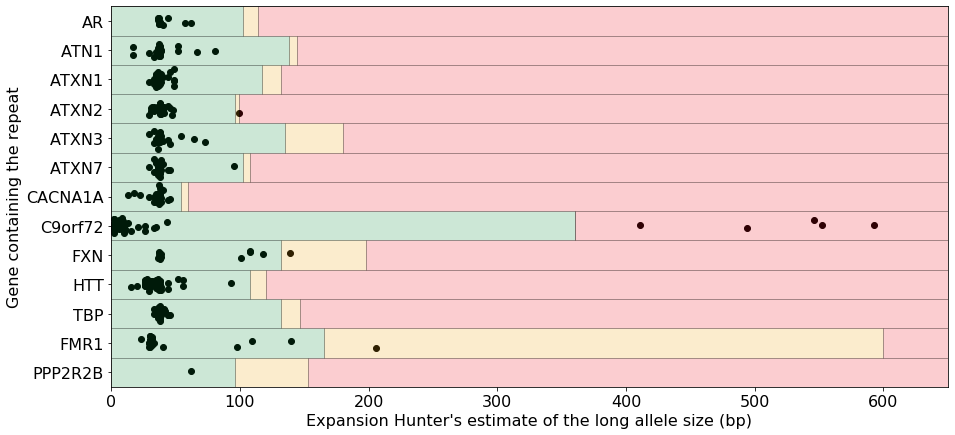

In [33]:
max_repeat_size = 650

fig, ax = plt.subplots(figsize=(15, 7))

for repeat_id, rec in repeat_sizes.groupby(by='loci'):
    normal_cutoff, premutation_cutoff = repeat_info[repeat_id]['expected_range']
    base_y = repeat_info[repeat_id]['index']
    
    ax.add_patch(patches.Rectangle((0, base_y - 0.5),
                                   normal_cutoff, 1.0,
                                   facecolor='#048732', alpha=0.2, ec='k'))
    
    ax.add_patch(patches.Rectangle((normal_cutoff, base_y - 0.5),
                                   premutation_cutoff - normal_cutoff,
                                   1.0, facecolor='#eda407', alpha=0.2, ec='k'))

    ax.add_patch(patches.Rectangle((premutation_cutoff, base_y - 0.5),
                                   max_repeat_size - premutation_cutoff,
                                   1.0, facecolor='#ed0716', alpha=0.2, ec='k'))

    
    allele_sizes = list(rec.max_EH_allele)
    ys = np.random.normal(base_y, 0.12, len(allele_sizes))
    ax.scatter(allele_sizes, ys, c='black')
    
    
    gene_names = [(gene, rec['index']) for gene, rec in repeat_info.items()]
    gene_names = sorted(gene_names, key=lambda k: k[1])
    gene_names = [g for g, _ in gene_names]
    ax.yaxis.set_ticks(range(0, len(gene_names)))
    ax.yaxis.set_ticklabels(gene_names)
    ax.margins(x=0, y=0)
    ax.set(xlabel='Expansion Hunter\'s estimate of the long allele size (bp)', ylabel='Locus containing the repeat');

In [34]:
# Let's save the plot into a PDF file
fig.savefig("foo.pdf", bbox_inches='tight')


In [35]:
# Let's save the plot into a high quality PNG file
fig.savefig("foo.png", bbox_inches='tight', dpi=600)